# Temperature - precipitation scaling 

Investigating changes of extreme precipitation with increases in temperature and moisture. 


In [2]:
import numpy as np 
import xarray as xr 
import atmotrans as atm
import matplotlib.pyplot as plt 
import glob

# elevation 
dem = '/media/juli/Data/projects/data/elevation/elevation_600x350.nc'
elevations = xr.open_dataarray(dem)
la = elevations.lat.values
lo = elevations.lon.values
elevations.close()

## Changes in tcwv and surface humidity  ERA5 vs. WRF9km 

In [73]:
# calculate tcwv
for y in np.arange(1980,2018):
    f_q = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/monthly/wrf_mean_q_pressure_'+str(y)+'.nc')
    f_sp = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/monthly/wrfout_'+str(y)+'_sp.nc')
    mixr = f_q.mixr[0].values  
    sp = f_sp.ps[0].values 
    q= np.nan_to_num(mixr, 0)
    colint = atm.column_integration(np.flip(f_q.pressure.values, axis = 0), sp, np.flip(q, axis =0 ))
    tcwv_x = xr.DataArray(colint)
    tcwv_x.to_netcdf('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/tcwv_'+str(y)+'.nc')


In [149]:
# calculate near surface humidity for annual files ERA5 
for y in np.arange(1980,2018):
    f_td = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/cache/srfc-monthly/tcwv_sp_td_'+str(y)+'.nc')
    f_sp = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/cache/srfc-monthly/tcwv_sp_td_'+str(y)+'.nc')
    td = f_td.d2m[0].values 
    # convert Pa to hPa
    sp = f_sp.sp[0].values / 100  
    q_surface = atm.get_surface_humidity(td, sp )
    q_surface_x = xr.DataArray(q_surface)
    q_surface_x.to_netcdf('/media/juli/Data/projects/moisture_transport/moisture_transport/era_surface_humidity_'+str(y)+'.nc')

In [ ]:
# calculate near surface humidity for annual files 
for y in np.arange(1980,2018):
    f_td = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/monthly/wrfout_'+str(y)+'_td.nc')
    f_sp = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/monthly/wrfout_'+str(y)+'_sp.nc')
    # Convert celsius to K 
    td = f_td.T2m[0].values  + 273.16
    sp = f_sp.ps[0].values 
    q_surface = atm.get_surface_humidity(td, sp )
    q_surface_x = xr.DataArray(q_surface)
    q_surface_x.to_netcdf('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/surface_humidity_'+str(y)+'.nc')

In [3]:

# ERA change in surface humidity 
era = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/cache/srfc-monthly/surface_humidity_1980-1999.nc')
era_q = era.__xarray_dataarray_variable__.values * 1000
era = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/cache/srfc-monthly/surface_humidity_2000-2019.nc')
era_q_recent= era.__xarray_dataarray_variable__.values * 1000

# ERA change tcwv
era = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/cache/srfc-monthly/tcwv_1980-1999.nc')
era_tcwv = era.tcwv[0]
era = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/cache/srfc-monthly/tcwv_2000-2019.nc')
era_tcwv_recent = era.tcwv[0]



# WRF change tcwv
wrf = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/tcwv_1980-1999.nc')
wrf_tcwv = wrf.__xarray_dataarray_variable__.values
wrf = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/tcwv_2000-2017.nc')
wrf_tcwv_recent = wrf.__xarray_dataarray_variable__.values
wrfdata = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/monthly/wrfout_TP9km_monthly_prcip_2001_05.nc')


# WRF change in surface humidity 
wrf = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/near_surface_humidity_1980-1999.nc')
wrf_q = wrf.__xarray_dataarray_variable__.values * 1000
wrf = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/near_surface_humidity_2000-2017.nc')
wrf_q_recent= wrf.__xarray_dataarray_variable__.values * 1000



#### climatology#### 

# ERA 
era = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/cache/srfc-monthly/surface_humidity_1980-2019.nc')
era_q_clim = era.__xarray_dataarray_variable__.values * 1000
era = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/cache/srfc-monthly/tcwv_1980-2019.nc')
era_tcwv_clim = era.tcwv[0]

# WRF 
wrf = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/surface_humidity_1980-2017.nc')
wrf_q_clim = wrf.__xarray_dataarray_variable__.values * 1000
wrf = xr.open_dataset('/media/juli/Data/projects/moisture_transport/moisture_transport/wrftp/data/tcwv_1980-2017.nc')
wrf_tcwv_clim= wrf.__xarray_dataarray_variable__.values 


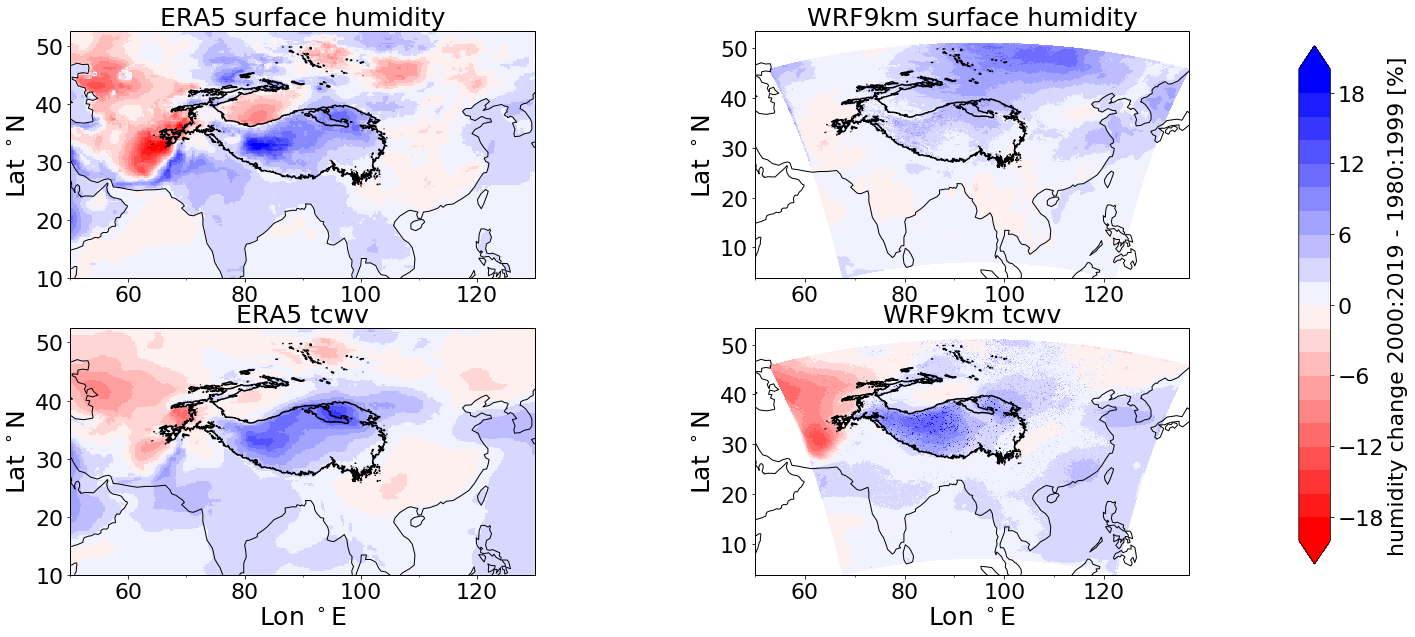

In [138]:
import matplotlib.colors as colors
import cartopy 
import cartopy.crs as ccrs

fig =plt.figure(figsize=(22,10))
xlabels=[50,60,70,80,90,100,110,120]
ylabels= [10,20,30,40,50]
fs= 25

# customizing of colorbar 
cmap=plt.cm.bwr_r
r = np.arange(-20,22,2)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)

#### ERA5 ##### 
lons =era.longitude.values
lats = era.latitude.values


ax1 = plt.subplot(2,2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m1=ax1.pcolormesh(lons, lats, (era_q_recent/ era_q )* 100 - 100, norm = norm, cmap = cmap  )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'ERA5 surface humidity', fontsize= fs)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)

ax1 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m2=ax1.pcolormesh(lons, lats, (era_tcwv_recent / era_tcwv) * 100 - 100 ,norm = norm, cmap = cmap )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'ERA5 tcwv', fontsize= fs)
# axis labels 
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=fs)



#### WRF #### 
lons =wrfdata.lon.values
lats = wrfdata.lat.values


ax1 = plt.subplot(2,2, 2, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m1=ax1.pcolormesh(lons, lats, (wrf_q_recent/ wrf_q) * 100 - 100, norm = norm, cmap = cmap  )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'WRF9km surface humidity', fontsize= fs)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)

ax1 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m2=ax1.pcolormesh(lons, lats, (wrf_tcwv_recent / wrf_tcwv) * 100 - 100 ,norm = norm, cmap = cmap )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'WRF9km tcwv', fontsize= fs)
# axis labels 
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=fs)

cb_ax1 = fig.add_axes([0.93, 0.14,0.02, 0.72])
cbar = fig.colorbar(m1, cax=cb_ax1, extend = 'both', label = 'humidity change 2000:2019 - 1980:1999 [%]')

plt.rcParams.update({'font.size': 22})

plt.savefig('plots/humidity_changes.png')
plt.show()

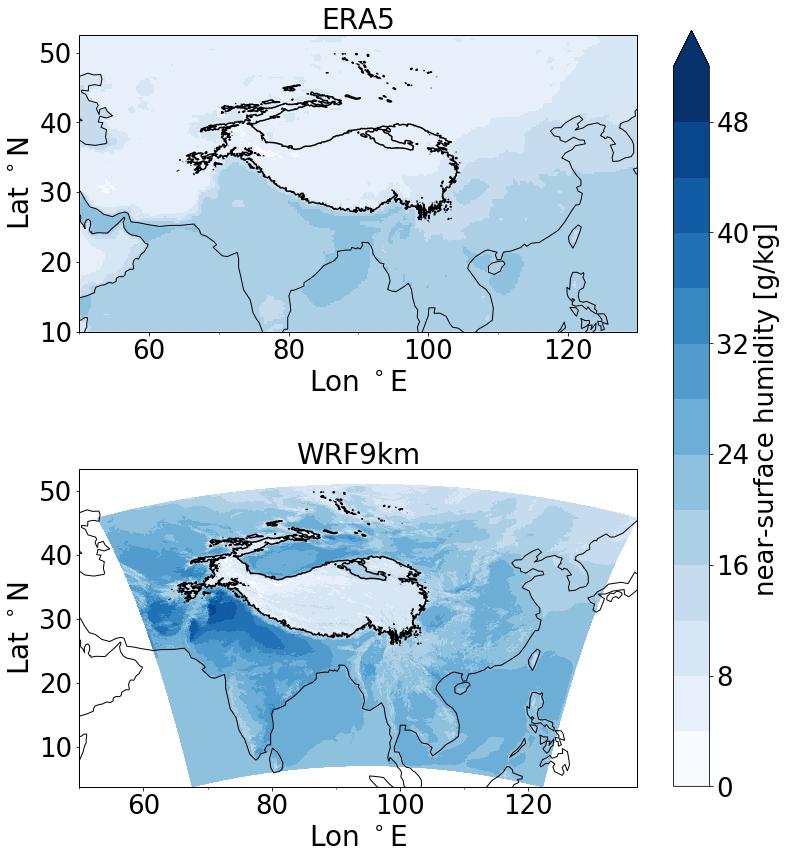

In [23]:
import matplotlib.colors as colors
import cartopy 
import cartopy.crs as ccrs

fig =plt.figure(figsize=(10,15))
xlabels=[50,60,70,80,90,100,110,120]
ylabels= [10,20,30,40,50]
fs= 28

# customizing of colorbar 
cmap=plt.cm.Blues

r = np.arange(0,0.054,0.004) * 1000
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)

r2 = np.arange(0,60,5)
norm2 = colors.BoundaryNorm(boundaries= r2,  ncolors= 256)


#### ERA5 ##### 
lons =era.longitude.values
lats = era.latitude.values


ax1 = plt.subplot(2,1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m1=ax1.pcolormesh(lons, lats, era_q_clim, norm = norm, cmap = cmap )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'ERA5', fontsize= fs)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=fs)

#### WRF #### 
lons =wrfdata.lon.values
lats = wrfdata.lat.values

ax1 = plt.subplot(2,1, 2, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m1=ax1.pcolormesh(lons, lats, wrf_q_clim, norm = norm, cmap = cmap )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'WRF9km', fontsize= fs)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=fs)

cb_ax1 = fig.add_axes([0.95, 0.15 ,0.05, 0.7])
cbar = fig.colorbar(m1, cax=cb_ax1, extend = 'max', label = 'near-surface humidity [g/kg]')
plt.rcParams.update({'font.size': 26})

plt.savefig('plots/surface_humidity_wrf_era5.png', bbox_inches = 'tight')
plt.show()

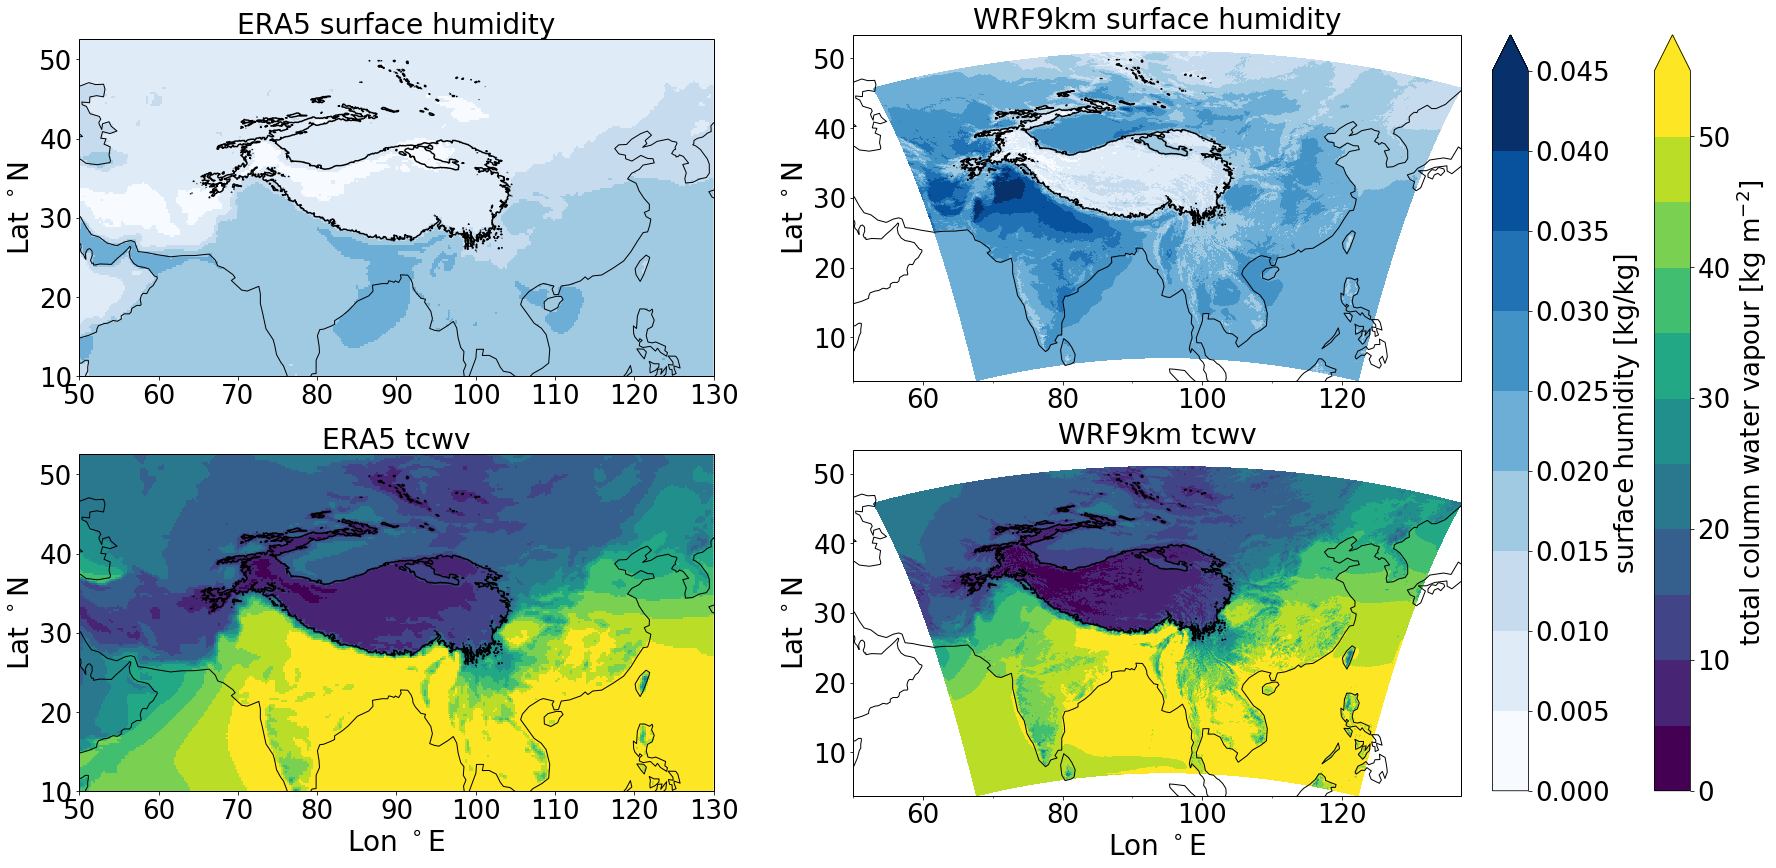

In [150]:
import matplotlib.colors as colors
import cartopy 
import cartopy.crs as ccrs

fig =plt.figure(figsize=(25,14))
xlabels=[50,60,70,80,90,100,110,120]
ylabels= [10,20,30,40,50]
fs= 28

# customizing of colorbar 
cmap=plt.cm.bwr_r
r = np.arange(0,0.05,0.005)
norm = colors.BoundaryNorm(boundaries= r,  ncolors= 256)

r2 = np.arange(0,60,5)
norm2 = colors.BoundaryNorm(boundaries= r2,  ncolors= 256)


#### ERA5 ##### 
lons =era.longitude.values
lats = era.latitude.values


ax1 = plt.subplot(2,2, 1, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m1=ax1.pcolormesh(lons, lats, era_q_clim/1000, norm = norm, cmap = 'Blues' )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'ERA5 surface humidity', fontsize= fs)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)


ax1 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m2=ax1.pcolormesh(lons, lats, era_tcwv_clim ,norm = norm2, cmap = 'viridis' )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'ERA5 tcwv', fontsize= fs)
# axis labels 
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=fs)


#### WRF #### 
lons =wrfdata.lon.values
lats = wrfdata.lat.values

ax1 = plt.subplot(2,2, 2, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m1=ax1.pcolormesh(lons, lats, wrf_q_clim/1000, norm = norm, cmap = 'Blues'  )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'WRF9km surface humidity', fontsize= fs)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)

ax1 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax1.set_extent([np.nanmin(lons),np.nanmax(lons),np.min(lats),45])
m2=ax1.pcolormesh(lons, lats, wrf_tcwv_clim ,norm = norm2, cmap = 'viridis' )
ax1.contour(lo,la, elevations.data.T, [3000], cmap = 'Greys_r')
ax1.coastlines(color = 'black')
ax1.set_title(r'WRF9km tcwv', fontsize= fs)
# axis labels 
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=fs)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=fs)


cb_ax1 = fig.add_axes([0.91, 0.13,0.02, 0.75])
cbar = fig.colorbar(m1, cax=cb_ax1, extend = 'max', label = 'surface humidity [kg/kg]')

cb_ax2 = fig.add_axes([1.0, 0.13,0.02, 0.75])
cbar = fig.colorbar(m2, cax=cb_ax2, extend = 'max', label = 'total column water vapour [kg m$^{-2}$]')

plt.rcParams.update({'font.size': 26})


plt.savefig('plots/humidity_wrf_era5.png', bbox_inches = 'tight')
plt.show()

## CC- relationship : August-Magnus-Roche approximation

In [277]:
# constants
c_0 = 6.1094
c_1 = 17.27
c_2 = 243.03 

def cc(t):
    return c_0 * np.exp(c_1 * t / (t + c_2))

def test(t):
    return np.exp(t)

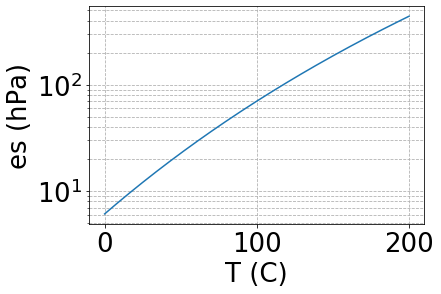

In [283]:
temps = np.linspace(0,80,201)
y_2 = cc(temps)
#y = test(temps)
#plt.plot(y)
plt.plot(y_2)
plt.yscale('log')
plt.grid(True,which="both", linestyle='--')
plt.xlabel('T (C)')
plt.ylabel('es (hPa)')

plt.show()

(0, 40)

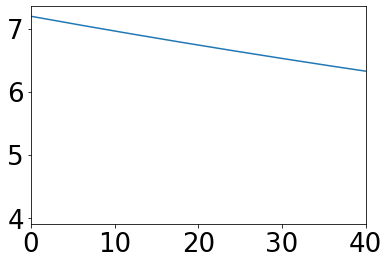

In [294]:
# get fractional change
# get middle values
t = 0.5 * (temps[1:] + temps[:-1])
# get change - derivative
dydp= np.diff(y_2) / np.diff(temps)
# calculate fraction of value
dydpt = dydp / y_2[:-1]
# in percent 
plt.plot(dydpt*100)
plt.xlim(0,40)

## 1. Binning 

- Attribute each hourly precipitation value of wet events to daily surface temperature bin of 2C bin width (temperature should represent air mass and should therefoe not be on a too short time scale)
- calculate percentiles for each bin size 

In [304]:
testdata = xr.open_dataset('/media/juli/Data/projects/data/ERA5/ERA5_2002-07_PT_GlHrly.nc')
# extract domain and fix unit (from m to mm per hour)                                                                                                  
lc= testdata.coords["longitude"]
la= testdata.coords["latitude"]
prcp= testdata.tp.loc[dict(longitude=lc[(lc > 50) & (lc < 135)], latitude=la[(la > 10) & (la < 60)])] * 1000
t2m= testdata.t2m.loc[dict(longitude=lc[(lc > 50) & (lc < 135)], latitude=la[(la > 10) & (la < 60)])] - 273.15
d2m= testdata.t2m.loc[dict(longitude=lc[(lc > 50) & (lc < 135)], latitude=la[(la > 10) & (la < 60)])] - 273.15

In [4]:
# apply additional regional selections (TP, ocean, land, con, div)
vimd = xr.open_dataset('../moisture_transport/moisture_transport/cache/era5_monthlymean_clim_moistdiv.nc').vimd[0]


In [311]:
bins = xr.open_dataset('cc_bins_2002.nc')

In [6]:
temp_bins = np.arange(-30,40,2)
precip_bins = np.linspace(0.1,1000, 3001)
binning= np.zeros((temp_bins.size, precip_bins.size))
binning.shape

# loop through years 


# loop through days in month 
for d in np.arange(1,31):
    # get mean daily surface temperature
    daily_temp = t2m.sel(time= (t2m['time.day'] == d) ).mean(dim='time')
    wet_hours = prcp.where(prcp_tp > 0.1)

    for idx in np.arange(temp_bins.size):
        i = temp_bins[idx]
        ii = i+2
        bin_values=wet_hours.where( (daily_temp >= i)  &  (daily_temp <= ii)    ).data
        values = bin_values[~np.isnan(bin_values)]
        histogram = np.histogram(wet_hours, bins = precip_bins)
        binning[idx] += histogram[0]
        
# save distributions 
xbins = xr.Dataset(binning)
xbins.to_netcdf('cc_bins_mon.nc') 


In [395]:
data_vars= dict(bins=(["temp_bins", "precip_bins"], binning))
coords = dict( temp_bins= temp_bins, precip_bins = precip_bins)
data= xr.Dataset(data_vars= data_vars, coords = coords)
data

<xarray.Dataset>
Dimensions:      (precip_bins: 3001, temp_bins: 35)
Coordinates:
  * temp_bins    (temp_bins) int64 -30 -28 -26 -24 -22 -20 ... 28 30 32 34 36 38
  * precip_bins  (precip_bins) float64 0.1 0.4333 0.7666 ... 999.3 999.7 1e+03
Data variables:
    bins         (temp_bins, precip_bins) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [344]:
def get_bins(binning, data, temp):
    bin_values=data.where( (temp >= i)  &  (temp <= ii)    ).data
    values = bin_values[~np.isnan(bin_values_d2m)]
    histogram = np.histogram(values, bins = precip_bins)
    binning[idx] += histogram[0]    
    return binning

In [315]:
percentiles99 = np.zeros((len(bins.keys())))
percentiles95 = np.zeros((len(bins.keys())))
percentiles90 = np.zeros((len(bins.keys())))

for idx,i in enumerate(np.arange(-30,40,2)): 
    if bins_con[i].size > 0:
        percentiles99[idx] = np.percentile(bins_con[i], 99 ) 
        percentiles95[idx] =  np.percentile(bins_con[i], 95 ) 
        percentiles90[idx] = np.percentile(bins_con[i], 90 ) 

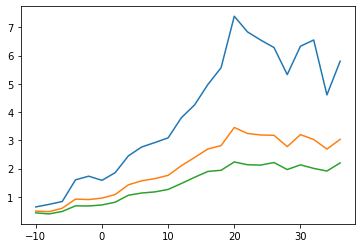

In [316]:
plt.plot(np.arange(-10,38,2), percentiles99[10:-1])
plt.plot(np.arange(-10,38,2), percentiles95[10:-1])
plt.plot(np.arange(-10,38,2), percentiles90[10:-1])


plt.show()

In [317]:
percentiles99 = np.zeros((len(bins.keys())))
percentiles95 = np.zeros((len(bins.keys())))
percentiles90 = np.zeros((len(bins.keys())))

for idx,i in enumerate(np.arange(-30,40,2)): 
    if bins_div[i].size > 0:
        percentiles99[idx] = np.percentile(bins_div[i], 99 ) 
        percentiles95[idx] =  np.percentile(bins_div[i], 95 ) 
        percentiles90[idx] = np.percentile(bins_div[i], 90 )  

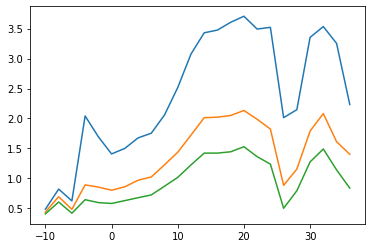

In [318]:
plt.plot(np.arange(-10,38,2), percentiles99[10:-1])
plt.plot(np.arange(-10,38,2), percentiles95[10:-1])
plt.plot(np.arange(-10,38,2), percentiles90[10:-1])
#plt.plot(np.arange(-11,38,2), cc(25, percentiles90[0]))
plt.show()

In [215]:
def cc(iterations, start):
    values = [start]
    for e in np.arange(iterations):
        val= values[-1]
        values.append(val + 0.07*val)
    
    return values 

## Temperature- precip scaling

In [606]:
def get_quantiles(quantile, bins, temp_bins, precip_bins):

    percentiles= np.array(())

    for t in temp_bins:
        count = bins.sel(temp_bins = t).values.sum()
        precip_values = bins.sel(temp_bins = t)/ count
        dx = np.diff(precip_bins)[0]
        cdf = np.cumsum(precip_values*dx)
        interp = np.interp(quantile, precip_bins ,cdf)
        percentiles = np.append(percentiles,interp)
    return percentiles

In [620]:
tp = xr.open_dataset('scaling/cc_bins_d2m_tp_JJA.nc') 
bins = tp.bins
percentiles_tp= get_quantiles(0.9, bins, bins.temp_bins, bins.precip_bins)

ocean = xr.open_dataset('scaling/cc_bins_d2m_ocean_JJA.nc') 
bins = ocean.bins
percentiles_ocean = get_quantiles(0.9, bins, bins.temp_bins, bins.precip_bins)

con = xr.open_dataset('scaling/cc_bins_d2m_con_JJA.nc') 
bins = con.bins
percentiles_con = get_quantiles(0.9, bins, bins.temp_bins, bins.precip_bins)

land = xr.open_dataset('scaling/cc_bins_d2m_land_JJA.nc') 
bins = land.bins
percentiles_land = get_quantiles(0.9, bins, bins.temp_bins, bins.precip_bins)

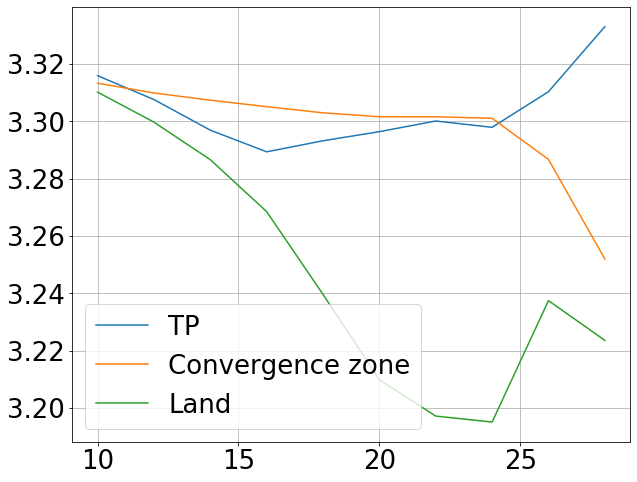

In [625]:
plt.figure(figsize=(10,8))

plt.plot(temp_bins[20:-5], percentiles_tp[20:-5], label = 'TP')
plt.plot(temp_bins[20:-5], percentiles_div[20:-5], label = 'Convergence zone')
plt.plot(temp_bins[20:-5], percentiles_con[20:-5], label = 'Land')
plt.grid()

plt.legend()
plt.show()